## Round2_test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests

## Data preparation

In [20]:
def wrangle_backtest(content_input):
    # Identify section indices by keywords
    try:
        ts_start = next(i for i, line in enumerate(content_input) if 'Trade History' in line)
        sandbox_log = next(i for i, line in enumerate(content_input) if 'Sandbox logs' in line)
        al_history = next(i for i, line in enumerate(content_input) if 'Activities log' in line)
    except StopIteration:
        raise ValueError("Required sections ('Trade History', 'Sandbox logs', or 'Activities log') not found in input.")

    # Extract and process sandbox logs
    sandbox_lines = content_input[sandbox_log + 1: al_history - 3]
    sandbox_json_str = '[' + ''.join(line.strip() for line in sandbox_lines).replace('}{', '},{') + ']'
    sandbox_logs = pd.DataFrame(json.loads(sandbox_json_str))

    # Extract and process activity logs
    activity_lines = content_input[al_history + 1: ts_start - 4]
    activity_df = pd.DataFrame([line.strip().split(';') for line in activity_lines])
    activity_df.columns = activity_df.iloc[0]  # Set header from first row
    activity_logs_df = activity_df[1:].reset_index(drop=True)

    # Extract and process trade history
    trade_lines = content_input[ts_start + 1:]
    trade_json_str = ''.join(trade_lines).replace(",\n  }", "\n  }").replace(",\n]", "\n]")
    trades_df = pd.DataFrame(json.loads(trade_json_str))

    return trades_df, activity_logs_df, sandbox_logs


In [21]:
# 1. Download log file from GitHub
url = "https://raw.githubusercontent.com/antek0308/IMC_strategy_prep/main/data/round2.log"
response = requests.get(url)
response.raise_for_status()  # Ensures you catch HTTP errors
content = response.text.splitlines()

# 2. Clean and structure the data using your wrangle function
trades_df, activity_logs_df, sandbox_logs = wrangle_backtest(content)

# 3. Quick sanity checks
print("Trades DataFrame shape:", trades_df.shape)
print("Activity Logs DataFrame shape:", activity_logs_df.shape)
print("Sandbox Logs DataFrame shape:", sandbox_logs.shape)

Trades DataFrame shape: (13443, 7)
Activity Logs DataFrame shape: (30000, 17)
Sandbox Logs DataFrame shape: (10000, 3)


In [22]:
# List unique instruments traded in round 2
unique_instruments = trades_df['symbol'].unique()

print(f"Instruments available in round 2: ({len(unique_instruments)} instruments)")
for symbol in unique_instruments:
    print(f" - {symbol}")


Instruments available in round 2: (3 instruments)
 - AMETHYSTS
 - STARFRUIT
 - ORCHIDS


In [23]:
print("=== Trade History Sample ===")
print(f"Total rows: {len(trades_df)}\n")
display(trades_df.head(10))

print("\n=== Activities Log Sample ===")
print(f"Total rows: {len(activity_logs_df)}\n")
display(activity_logs_df.head(10))

print("\n=== Sandbox Logs Sample ===")
print(f"Total rows: {len(sandbox_logs)}\n")
display(sandbox_logs.head(10))


=== Trade History Sample ===
Total rows: 13443



,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
1,200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
2,200,,SUBMISSION,STARFRUIT,SEASHELLS,5027,1
3,300,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
4,300,,,STARFRUIT,SEASHELLS,5022,1
5,500,,SUBMISSION,STARFRUIT,SEASHELLS,5028,2
6,500,,SUBMISSION,AMETHYSTS,SEASHELLS,10004,2
7,700,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,9
8,900,SUBMISSION,,STARFRUIT,SEASHELLS,5022,8
9,1000,,,AMETHYSTS,SEASHELLS,10002,1



=== Activities Log Sample ===
Total rows: 30000



,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,AMETHYSTS,9998,3,9996,1,9995,21,10004,1,10005,21,,,10001.0,0.0
1,2,0,ORCHIDS,1053,10,1052,3,1046,41,1059,10,1060,3,1067,41,1056.0,0.0
2,2,0,STARFRUIT,5023,1,5022,22,,,5029,22,,,,,5026.0,0.0
3,2,100,AMETHYSTS,9995,26,,,,,9998,1,10005,26,,,9996.5,0.0
4,2,100,STARFRUIT,5022,26,,,,,5027,5,5029,26,,,5024.5,0.0
5,2,100,ORCHIDS,1051,6,1050,2,1045,51,1058,6,1059,2,1065,51,1054.5,0.0
6,2,200,AMETHYSTS,9996,2,9995,30,,,9998,1,10004,2,10005,30,9997.0,2.0
7,2,200,ORCHIDS,1051,6,1050,3,1045,49,1058,6,1059,3,1065,49,1054.5,0.0
8,2,200,STARFRUIT,5027,1,5022,2,5021,30,5028,32,,,,,5027.5,0.0
9,2,300,STARFRUIT,5022,27,,,,,5029,28,,,,,5025.5,1.53369140625



=== Sandbox Logs Sample ===
Total rows: 10000



,sandboxLog,lambdaLog,timestamp
0,,"[[0,"""",[[""STARFRUIT"",""STARFRUIT"",1],[""AMETHYST...",0
1,,"[[100,""{\""AMETHYSTS\"":[false],\""STARFRUIT\"":[f...",100
2,,"[[200,""{\""AMETHYSTS\"":[false,false],\""STARFRUI...",200
3,,"[[300,""{\""AMETHYSTS\"":[false,false,false],\""ST...",300
4,,"[[400,""{\""AMETHYSTS\"":[false,false,false,false...",400
5,,"[[500,""{\""AMETHYSTS\"":[false,false,false,false...",500
6,,"[[600,""{\""AMETHYSTS\"":[false,false,false,false...",600
7,,"[[700,""{\""AMETHYSTS\"":[false,false,false,false...",700
8,,"[[800,""{\""AMETHYSTS\"":[false,false,false,false...",800
9,,"[[900,""{\""AMETHYSTS\"":[false,false,false,false...",900


## Data Analysis

In [24]:
# List of selected instruments
symbols_of_interest = ['AMETHYSTS', 'STARFRUIT', 'ORCHIDS']

for symbol in symbols_of_interest:
    symbol_df = trades_df[trades_df['symbol'] == symbol].copy()
    symbol_df['timestamp'] = pd.to_numeric(symbol_df['timestamp'], errors='coerce')
    symbol_df = symbol_df.sort_values('timestamp')
    
    print(f"\n=== {symbol} trades ({len(symbol_df)}) ===")
    display(symbol_df)



=== AMETHYSTS trades (3749) ===


,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
1,200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
3,300,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1
6,500,,SUBMISSION,AMETHYSTS,SEASHELLS,10004,2
7,700,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,9
...,...,...,...,...,...,...,...
13434,999200,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
13437,999400,,,AMETHYSTS,SEASHELLS,10004,1
13438,999400,,SUBMISSION,AMETHYSTS,SEASHELLS,10004,1
13440,999700,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1



=== STARFRUIT trades (3980) ===


,timestamp,buyer,seller,symbol,currency,price,quantity
2,200,,SUBMISSION,STARFRUIT,SEASHELLS,5027,1
4,300,,,STARFRUIT,SEASHELLS,5022,1
5,500,,SUBMISSION,STARFRUIT,SEASHELLS,5028,2
8,900,SUBMISSION,,STARFRUIT,SEASHELLS,5022,8
11,1200,,,STARFRUIT,SEASHELLS,5022,1
...,...,...,...,...,...,...,...
13421,998200,SUBMISSION,,STARFRUIT,SEASHELLS,5001,1
13424,998400,SUBMISSION,,STARFRUIT,SEASHELLS,5001,2
13428,998600,,,STARFRUIT,SEASHELLS,5001,1
13439,999400,,SUBMISSION,STARFRUIT,SEASHELLS,5008,2



=== ORCHIDS trades (5714) ===


,timestamp,buyer,seller,symbol,currency,price,quantity
58,8000,,SUBMISSION,ORCHIDS,SEASHELLS,1069,2
114,15500,,SUBMISSION,ORCHIDS,SEASHELLS,1079,4
121,16500,,SUBMISSION,ORCHIDS,SEASHELLS,1067,8
155,20200,,SUBMISSION,ORCHIDS,SEASHELLS,1061,9
160,20500,,,ORCHIDS,SEASHELLS,1056,2
...,...,...,...,...,...,...,...
13427,998500,,SUBMISSION,ORCHIDS,SEASHELLS,1053,100
13431,998900,,SUBMISSION,ORCHIDS,SEASHELLS,1050,100
13433,999100,,SUBMISSION,ORCHIDS,SEASHELLS,1051,100
13435,999300,,SUBMISSION,ORCHIDS,SEASHELLS,1051,100


In [25]:
for symbol in symbols_of_interest:
    symbol_df = trades_df[trades_df['symbol'] == symbol]
    print(f"\n{symbol} summary:")
    print(symbol_df.describe(include='all'))



AMETHYSTS summary:
            timestamp buyer seller     symbol   currency         price  \
count     3749.000000  3749   3749       3749       3749   3749.000000   
unique            NaN     2      2          1          1           NaN   
top               NaN               AMETHYSTS  SEASHELLS           NaN   
freq              NaN  2489   2531       3749       3749           NaN   
mean    503465.137370   NaN    NaN        NaN        NaN  10000.029341   
std     283790.954643   NaN    NaN        NaN        NaN      2.689894   
min        100.000000   NaN    NaN        NaN        NaN   9995.000000   
25%     267600.000000   NaN    NaN        NaN        NaN   9998.000000   
50%     502500.000000   NaN    NaN        NaN        NaN  10000.000000   
75%     743700.000000   NaN    NaN        NaN        NaN  10002.000000   
max     999900.000000   NaN    NaN        NaN        NaN  10005.000000   

          quantity  
count   3749.00000  
unique         NaN  
top            NaN  
freq   

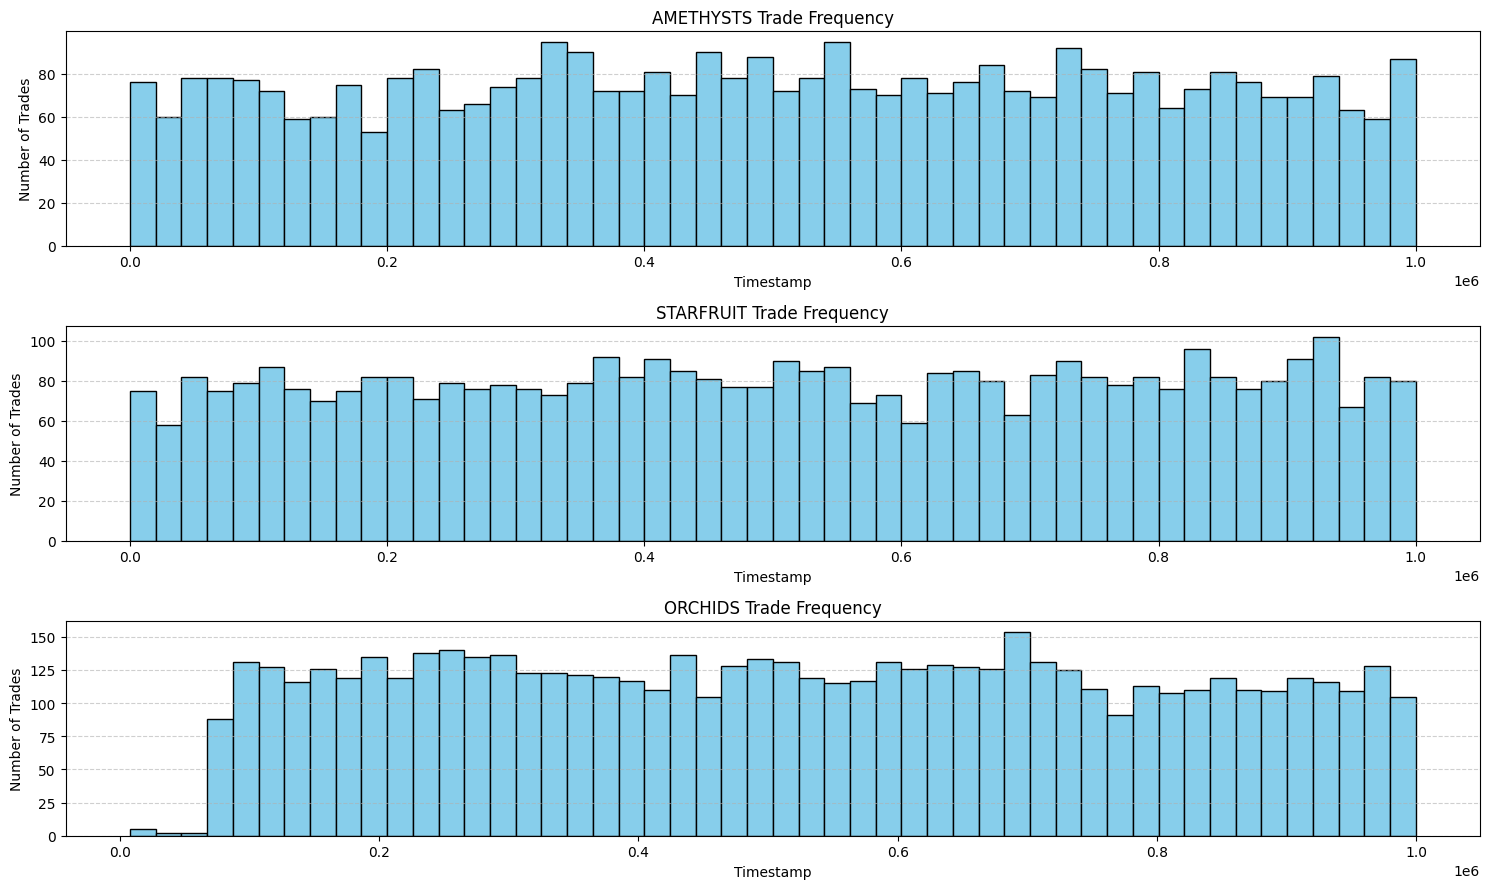

In [28]:
import matplotlib.pyplot as plt

products = trades_df["symbol"].unique()
num_products = len(products)
fig, axes = plt.subplots(num_products, figsize=(15, 3*num_products), sharex=False)

# If only one product, axes is not iterable, so wrap in a list
if num_products == 1:
    axes = [axes]

for i, product in enumerate(products):
    product_trades = trades_df[trades_df["symbol"] == product]
    axes[i].hist(product_trades["timestamp"], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{product} Trade Frequency")
    axes[i].set_xlabel("Timestamp")
    axes[i].set_ylabel("Number of Trades")
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


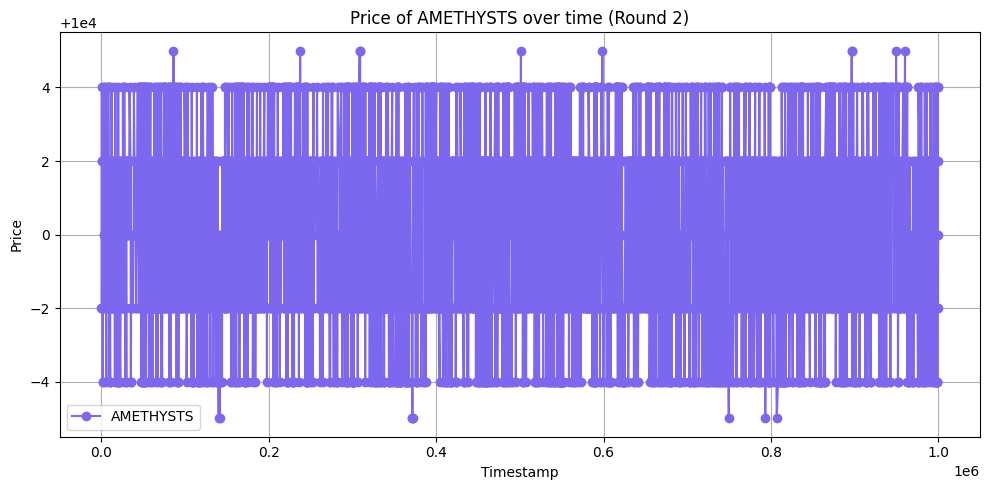

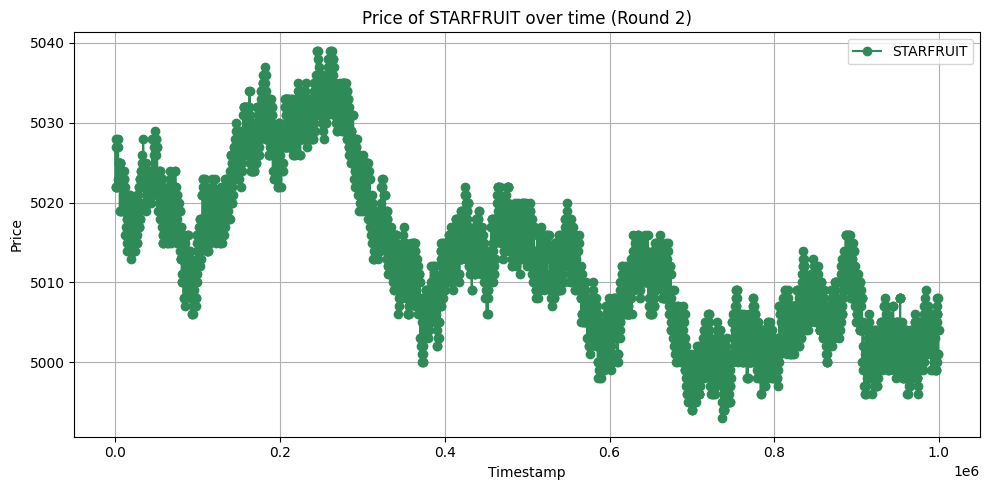

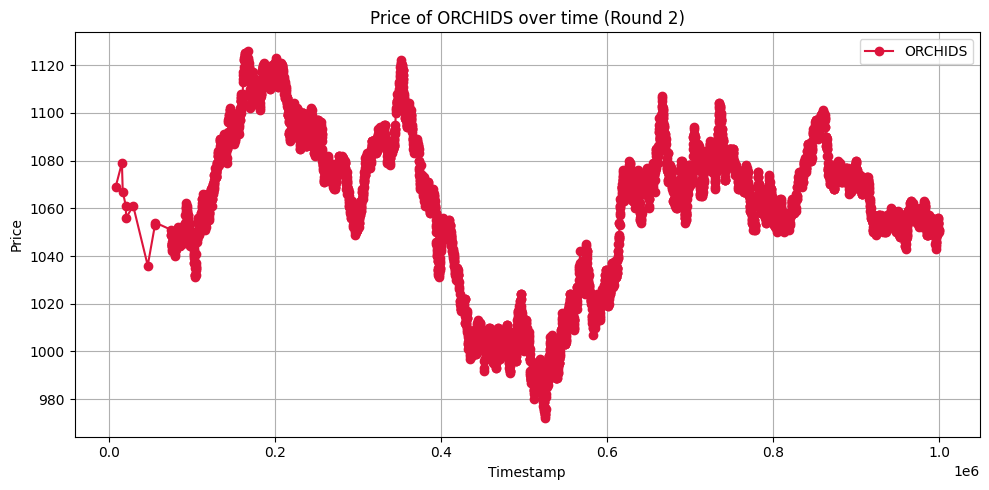

In [30]:
import matplotlib.pyplot as plt

# Define distinct colors for each instrument
instrument_colors = {
    'AMETHYSTS': 'mediumslateblue',
    'STARFRUIT': 'seagreen',
    'ORCHIDS': 'crimson'
}

instruments = ['AMETHYSTS', 'STARFRUIT', 'ORCHIDS']

for instrument in instruments:
    instrument_df = trades_df[trades_df['symbol'] == instrument].copy()
    instrument_df['timestamp'] = pd.to_numeric(instrument_df['timestamp'], errors='coerce')
    instrument_df = instrument_df.sort_values('timestamp')

    plt.figure(figsize=(10, 5))
    plt.plot(
        instrument_df['timestamp'],
        instrument_df['price'],
        marker='o',
        color=instrument_colors[instrument],
        label=instrument
    )
    plt.title(f"Price of {instrument} over time (Round 2)")
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Analysis on Instrument Price Trends

###  **AMETHYSTS**
 
  The price chart for AMETHYSTS displays highly erratic, non-continuous values—often jumping between large positive and negative levels with little in-between.

  - The data is highly discrete, not resembling typical financial time series behavior.
  - This may indicate either synthetic/test data, a data logging error, or a special asset with unusual pricing logic.
  - There is no observable price trend or volatility pattern, just repeated extreme price levels.

---

###  **STARFRUIT**
 
  STARFRUIT shows smooth, realistic price evolution with moderate volatility and no apparent data gaps or anomalies. Price fluctuates mostly between 5,000 and 5,040.

  - The instrument displays both upward and downward trends over time.
  - The relatively narrow price range suggests low volatility.
  - The price path appears suitable for both momentum and mean-reversion trading strategies.

---

###  **ORCHIDS**
 
  ORCHIDS exhibits distinct price cycles, with visible trends, peaks, corrections, and reversals. The price ranges from 980 to 1,120, showing more volatility than STARFRUIT.

  - There are identifiable trending periods as well as corrections, indicating both trend-following and mean-reversion patterns.
  - Price swings are larger, suggesting higher volatility.

---


In [37]:
import pandas as pd

def calculate_price_correlation(df1, df2, name1, name2):
    """
    Calculates and prints the Pearson correlation between two instruments' price series,
    matched on the nearest timestamp.
    """
    # Ensure timestamps are numeric and sorted
    df1 = df1.copy()
    df2 = df2.copy()
    df1['timestamp'] = pd.to_numeric(df1['timestamp'], errors='coerce')
    df2['timestamp'] = pd.to_numeric(df2['timestamp'], errors='coerce')
    df1 = df1.sort_values('timestamp')
    df2 = df2.sort_values('timestamp')
    
    # Merge on nearest timestamp
    merged = pd.merge_asof(
        df1, df2, on="timestamp", direction="nearest",
        suffixes=(f"_{name1.upper()}", f"_{name2.upper()}")
    )
    
    # Calculate correlation
    col1 = f"price_{name1.upper()}"
    col2 = f"price_{name2.upper()}"
    correlation = merged[col1].corr(merged[col2])
    print(f"📈 Correlation between {name1} and {name2} prices: {correlation:.4f}")

# Example usage:
calculate_price_correlation(STARFRUIT_df, ORCHIDS_df, 'STARFRUIT', 'ORCHIDS')



📈 Correlation between STARFRUIT and ORCHIDS prices: 0.2000


### Correlation Analysis Insight


**Correlation coefficient:** 0.20 (Weak correlation)

The price series of STARFRUIT and ORCHIDS move largely **independently** of each other. There is little evidence that movements in one instrument’s price are systematically reflected in the other.
  
These products are likely influenced by different factors or have unrelated price dynamics.
This lack of correlation could be useful for portfolio diversification: combining both instruments in a portfolio may help to reduce overall risk due to their independent movements.
If you’re developing trading strategies, it suggests that price signals from one instrument are **not** reliable predictors for the other.


In [38]:
stats = []

for instrument in instruments:
    prices = trades_df.loc[trades_df['symbol'] == instrument, 'price']
    desc = prices.describe()[['mean', 'std', 'min', 'max']]
    stats.append([instrument, desc['mean'], desc['std'], desc['min'], desc['max']])

stats_df = pd.DataFrame(stats, columns=['Instrument', 'Mean', 'Std', 'Min', 'Max'])
print(stats_df)


  Instrument          Mean        Std     Min      Max
0  AMETHYSTS  10000.029341   2.689894  9995.0  10005.0
1  STARFRUIT   5012.681407   9.935960  4993.0   5039.0
2    ORCHIDS   1061.089079  32.556259   972.0   1126.0



VWAP values for AMETHYSTS:

0   timestamp        VWAP_1        VWAP_2  VWAP_3
0           0   9999.500000  10004.590909     NaN
3         100   9995.111111           NaN     NaN
6         200   9996.666667   9995.562500     NaN
11        300   9997.000000   9995.321429     NaN
12        400  10000.000000           NaN     NaN
15        500  10000.000000           NaN     NaN
18        600  10000.000000           NaN     NaN
23        700   9995.843750           NaN     NaN
26        800  10000.000000  10000.000000     NaN
27        900  10000.000000           NaN     NaN


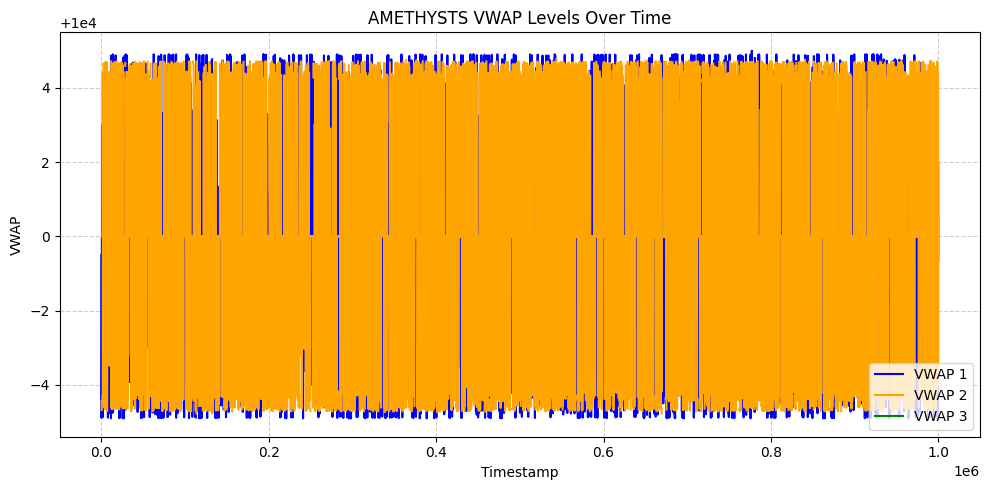


VWAP values for ORCHIDS:

0   timestamp  VWAP_1  VWAP_2  VWAP_3
1           0  1056.0  1056.0  1056.5
5         100  1054.5  1054.5  1055.0
7         200  1054.5  1054.5  1055.0
10        300  1055.5  1055.5  1055.5
13        400  1056.5  1056.5  1056.5
17        500  1056.5  1056.5  1057.0
19        600  1057.5  1057.5  1058.0
22        700  1057.5  1057.5  1057.5
24        800  1057.5  1057.5  1058.0
29        900  1057.5  1057.5  1058.0


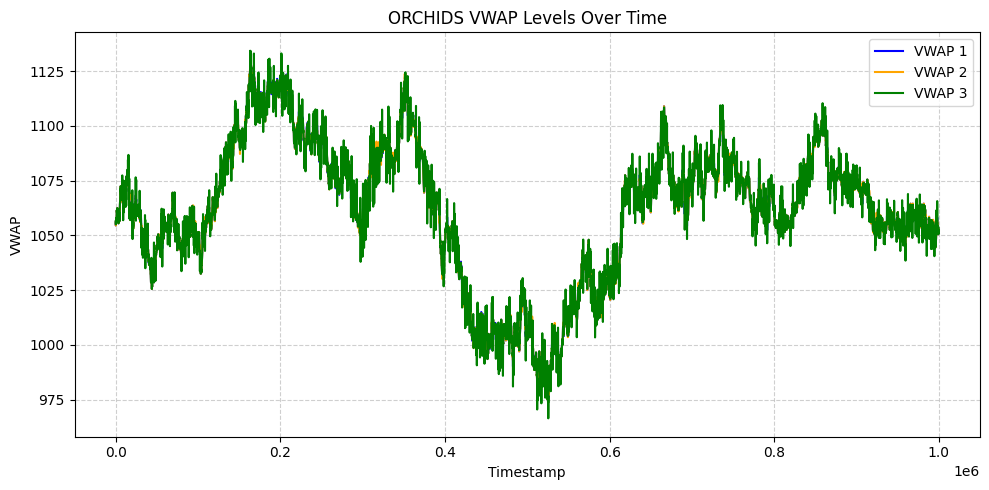


VWAP values for STARFRUIT:

0   timestamp       VWAP_1  VWAP_2  VWAP_3
2           0  5028.739130     NaN     NaN
4         100  5022.806452     NaN     NaN
8         200  5027.969697     NaN     NaN
9         300  5025.563636     NaN     NaN
14        400  5027.000000     NaN     NaN
16        500  5025.500000     NaN     NaN
20        600  5022.370370     NaN     NaN
21        700  5027.928571     NaN     NaN
25        800  5022.206897     NaN     NaN
28        900  5024.500000     NaN     NaN


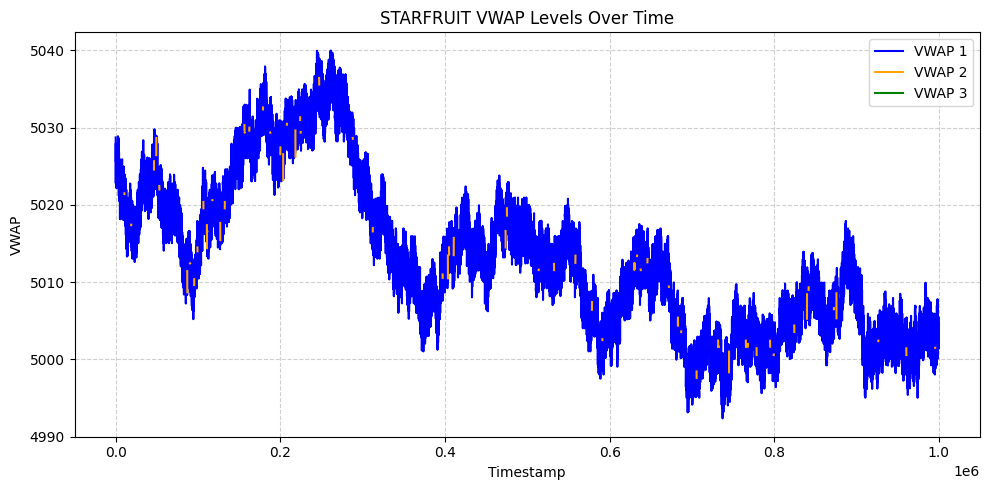

In [40]:
import matplotlib.pyplot as plt

products = activity_logs_df['product'].unique()

# Ensure columns are numeric for calculation
cols = [
    'bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1',
    'bid_price_2', 'ask_price_2', 'bid_volume_2', 'ask_volume_2',
    'bid_price_3', 'ask_price_3', 'bid_volume_3', 'ask_volume_3',
    'timestamp'
]
activity_logs_df[cols] = activity_logs_df[cols].apply(pd.to_numeric, errors='coerce')

for product in products:
    df = activity_logs_df[activity_logs_df['product'] == product].copy()
    df = df.dropna(subset=['timestamp'])

    # VWAP Calculation (handle 0 volume to avoid division by zero)
    for i in range(1, 4):
        bid = df[f'bid_price_{i}']
        ask = df[f'ask_price_{i}']
        bid_vol = df[f'bid_volume_{i}']
        ask_vol = df[f'ask_volume_{i}']
        total_vol = bid_vol + ask_vol
        # Avoid division by zero
        df[f'VWAP_{i}'] = np.where(
            total_vol != 0,
            (bid * bid_vol + ask * ask_vol) / total_vol,
            np.nan
        )

    print(f"\nVWAP values for {product}:\n")
    print(df[['timestamp', 'VWAP_1', 'VWAP_2', 'VWAP_3']].head(10))

    plt.figure(figsize=(10, 5))
    for i, color in zip(range(1, 4), ['blue', 'orange', 'green']):
        plt.plot(df['timestamp'], df[f'VWAP_{i}'], label=f'VWAP {i}', color=color)
    plt.title(f'{product} VWAP Levels Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('VWAP')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


## VWAP Analysis

### AMETHYSTS

The VWAP plot for AMETHYSTS shows only VWAP1 and VWAP2 (VWAP3 is mostly missing). VWAP values are clustered near 10,000, with frequent large jumps and erratic swings, especially in VWAP2.

High volatility and discontinuity likely indicate low liquidity or sparse order book beyond the top level.
Frequent NaNs in VWAP2 and VWAP3 suggest insufficient depth—deeper book levels are rarely quoted.
This pattern fits a thinly traded or illiquid product.

---

### ORCHIDS

  VWAP1, VWAP2, and VWAP3 are all present, smooth, and closely aligned. Prices show visible up-and-down trends, but all VWAP lines nearly overlap.

Tight clustering of VWAPs suggests a liquid and deep market, with balanced bid/ask volumes.
Trend patterns indicate fair and active trading.

---

### STARFRUIT

  Only VWAP1 is present and stable, with VWAP2 and VWAP3 mostly NaN. VWAP1 displays a steady, slightly downward trend.

Limited depth beyond top of book—possible low liquidity or trading activity.
Persistent downward VWAP1 may reflect steady selling or low demand.

---


                VWAP_1        VWAP_2        VWAP_3
Product                                           
AMETHYSTS  9999.968924  10000.010292  10000.000000
ORCHIDS    1061.861659   1061.856669   1061.928398
STARFRUIT  5013.275259   5013.417140           NaN


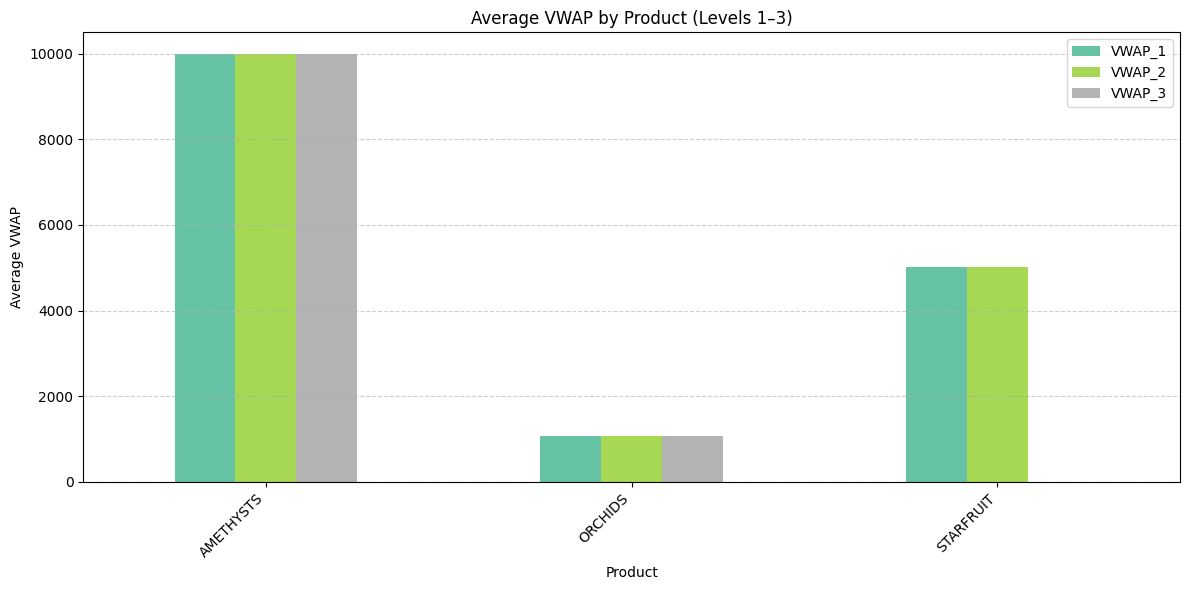

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all columns are numeric
vwap_levels = [1, 2, 3]
cols = []
for level in vwap_levels:
    cols += [f'bid_price_{level}', f'ask_price_{level}', f'bid_volume_{level}', f'ask_volume_{level}']

# Calculate VWAP summary by product
vwap_summary = []
product_list = activity_logs_df['product'].unique()

for product in product_list:
    df = activity_logs_df[activity_logs_df['product'] == product].copy()
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
    vwap_means = {}
    for level in vwap_levels:
        price = df[f'bid_price_{level}'] * df[f'bid_volume_{level}'] + df[f'ask_price_{level}'] * df[f'ask_volume_{level}']
        volume = df[f'bid_volume_{level}'] + df[f'ask_volume_{level}']
        vwap = price / volume
        vwap_means[f'VWAP_{level}'] = vwap.mean()
    row = {'Product': product}
    row.update(vwap_means)
    vwap_summary.append(row)

vwap_df = pd.DataFrame(vwap_summary).set_index('Product')
print(vwap_df.head(10))

# Visualization
vwap_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average VWAP by Product (Levels 1–3)')
plt.xlabel('Product')
plt.ylabel('Average VWAP')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Analysis: Average VWAP by Product (Levels 1–3)

The chart and table above display the average VWAP (Volume Weighted Average Price) for each product (AMETHYSTS, ORCHIDS, STARFRUIT) at three different order book levels.


**AMETHYSTS**
VWAP is consistently ~10,000 across all three levels.
Indicates a very stable price and possibly high liquidity or a synthetic/pegged product.
(VWAP_1, VWAP_2, VWAP_3) are almost identical, showing little depth impact.

**ORCHIDS**
VWAP is ~1,062 for all levels.
Price is also very stable across order book depth, likely a liquid product or tightly managed book.
No significant drop or rise from level 1 to 3.

**STARFRUIT**
WAP is ~5,013 for level 1 and 2. Level 3 is missing (NaN), possibly due to insufficient data at that depth.
Price is stable at the top two levels, but lack of level 3 data may indicate thinner liquidity at deeper levels or missing quotes.


 **Tight Spreads & Deep Books:**  
  For AMETHYSTS and ORCHIDS, the almost identical VWAPs at all levels suggest tight bid/ask spreads and stable prices, indicating strong liquidity and minimal price impact for moderate trade sizes.
 **STARFRUIT Depth:**  
  The absence of VWAP_3 suggests the order book may be shallow or not all depth levels are consistently quoted/traded. This can indicate lower liquidity, making large trades more expensive.
 **No Major Outliers:**  
  None of the products show wild jumps in VWAP across levels, so there are no clear outliers or anomalies in quoted prices.


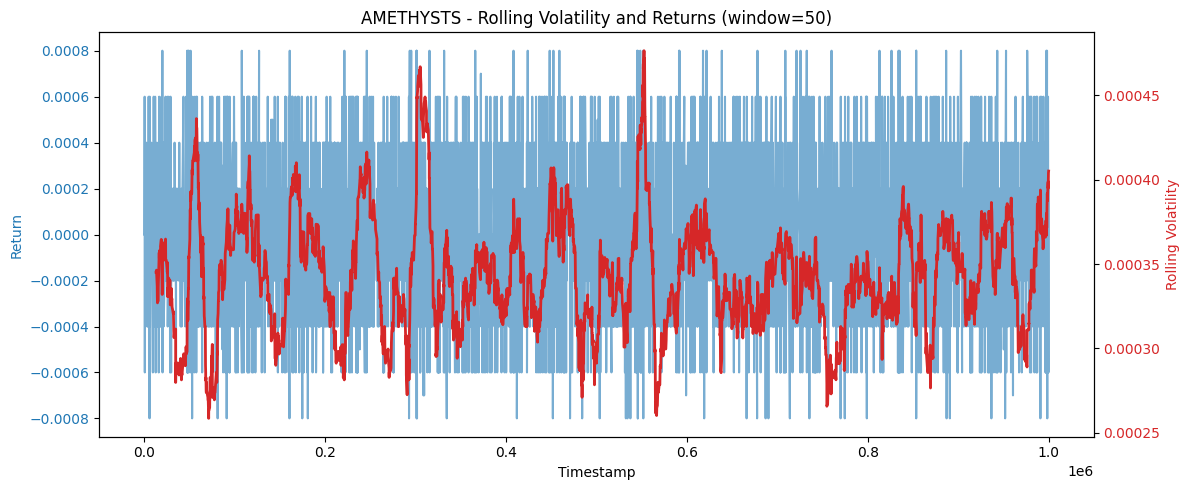

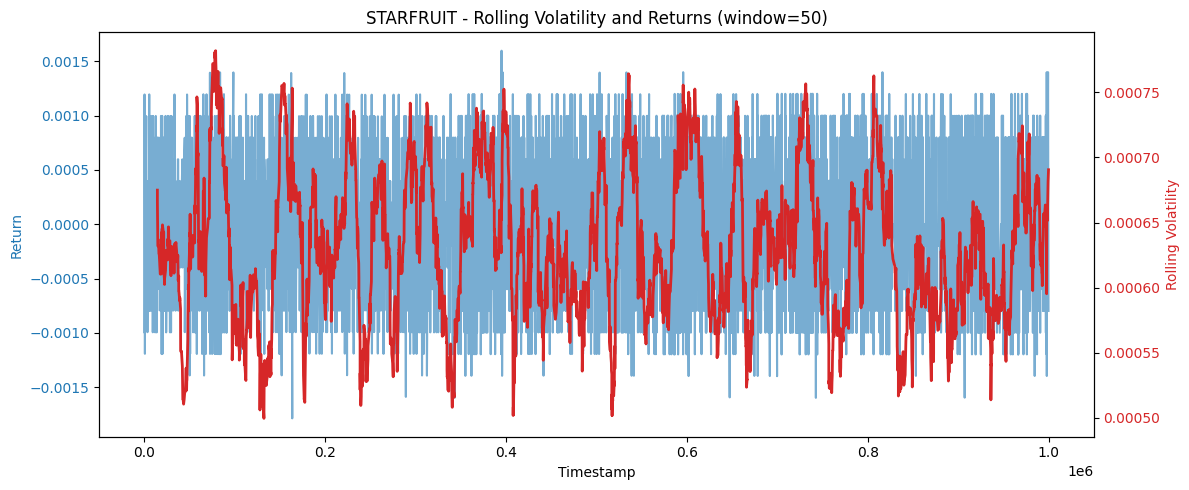

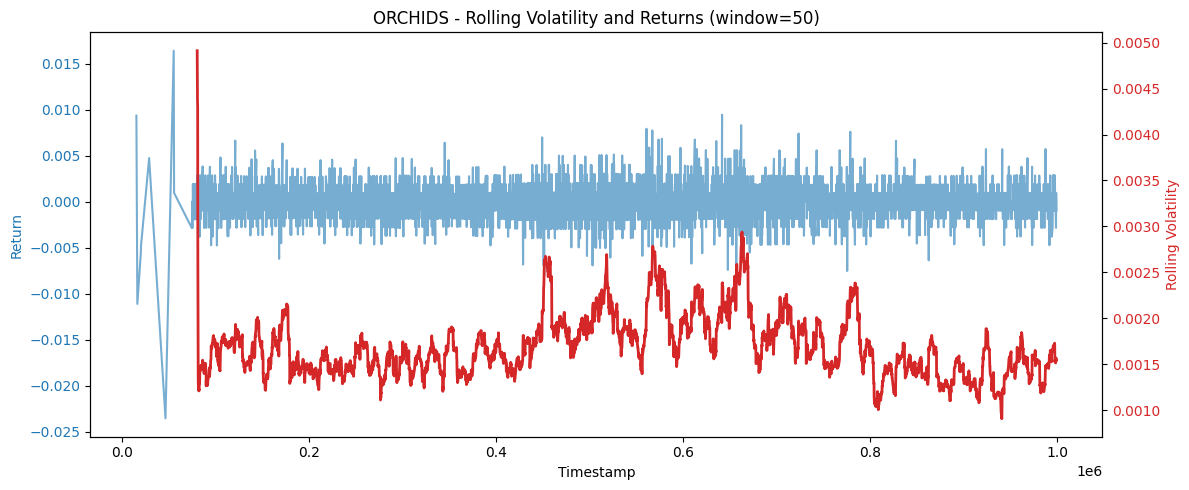

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

instruments = ['AMETHYSTS', 'STARFRUIT', 'ORCHIDS']
window = 50  # Rolling window size (adjust as needed)

for instrument in instruments:
    df = trades_df[trades_df['symbol'] == instrument].copy()
    df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
    df = df.sort_values('timestamp')
    df = df.reset_index(drop=True)
    
    # Calculate simple returns
    df['return'] = df['price'].pct_change()
    
    # Calculate rolling volatility (std of returns)
    df['rolling_volatility'] = df['return'].rolling(window=window).std()
    
    # Plot
    fig, ax1 = plt.subplots(figsize=(12, 5))
    ax1.plot(df['timestamp'], df['return'], label='Return', color='tab:blue', alpha=0.6)
    ax1.set_ylabel('Return', color='tab:blue')
    ax1.set_xlabel('Timestamp')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_title(f"{instrument} - Rolling Volatility and Returns (window={window})")
    
    ax2 = ax1.twinx()
    ax2.plot(df['timestamp'], df['rolling_volatility'], label='Rolling Volatility', color='tab:red', linewidth=2)
    ax2.set_ylabel('Rolling Volatility', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    fig.tight_layout()
    plt.show()


## Rolling Volatility and Returns Analysis

###  **AMETHYSTS**
- **Returns:**  
  Returns are very “spiky” and jump frequently between extremes, reflecting the underlying noisy and non-continuous price data seen before.
- **Volatility:**  
  The rolling volatility oscillates but stays within a very narrow band, with no periods of sustained increase or decrease.
- **Insight:**  
  The abnormal return pattern further confirms that AMETHYSTS may be synthetic, have a problematic price feed, or serve as a stress-test asset. There are no sustained trends or realistic volatility cycles.

---

###  **STARFRUIT**
- **Returns:**  
  Returns show regular oscillations around zero with some spikes, indicating both upward and downward price moves.
- **Volatility:**  
  Rolling volatility varies over time, showing periodic rises and falls, but stays generally moderate (not explosive).
- **Insight:**  
  The volatility profile is healthy and typical for a realistic tradable asset. STARFRUIT has moderate, manageable risk, and volatility is clustered in time (volatility “regimes” can be detected).

---

###  **ORCHIDS**
- **Returns:**  
  Returns are more volatile than STARFRUIT and show higher peaks and troughs, particularly in some periods.
- **Volatility:**  
  Rolling volatility is much higher and varies greatly over time, with notable periods of increased risk and drawdown.
- **Insight:**  
  ORCHIDS appears riskier, with more pronounced swings in both returns and volatility. This instrument may require tighter risk management or position sizing for live trading or backtests.

---

### **General Remarks**
- **AMETHYSTS**: Unusual, not suitable for normal trading models—likely best used for code robustness testing.
- **STARFRUIT**: Displays stable, realistic return and volatility dynamics. Good candidate for trading strategy backtesting and risk modeling.
- **ORCHIDS**: Higher volatility and risk, but realistic. Offers potential for high-reward strategies, but only with appropriate risk controls.
